In [5]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
!pip install pcse

     |████████████████████████████████| 798kB 4.5MB/s 
     |████████████████████████████████| 112kB 23.3MB/s 
  Created wheel for pcse: filename=PCSE-5.4.2-cp36-none-any.whl size=900775 sha256=c430f5398e238e2ae84584346fa0ceea10316ad05984b4fb119c2ecfc3f18540
  Stored in directory: /root/.cache/pip/wheels/72/f2/25/eb3a4245095abbf92eb6766bb06a1e012269e8d3916752df7d
  Created wheel for traitlets-pcse: filename=traitlets_pcse-5.0.0.dev0-py2.py3-none-any.whl size=92081 sha256=91eafe381c12ee1bd741751a4116bc5b73269f41df2c141bf7f8d372252f7bd1
  Stored in directory: /root/.cache/pip/wheels/38/86/d2/1e90ed032a819fc04cf61ab6d7a799ec1900b0acdc017f159c
Successfully built pcse traitlets-pcse


In [2]:
#NASA Weather system
from pcse.db import NASAPowerWeatherDataProvider

Building PCSE demo database at: /tmp/.pcse/pcse.db ... OK


In [3]:
#export weather to list
from pcse.db import NASAPowerWeatherDataProvider

kursk_weather = NASAPowerWeatherDataProvider(35, 44)
print(kursk_weather)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data
----Site characteristics----
Elevation:  284.5
Latitude:  35.000
Longitude: 44.000
Data available for 1983-07-01 - 2020-06-01
Number of missing days: 12



In [12]:
#export to pandas Dataframe

df_weather = pd.DataFrame(kursk_weather.export())
print('initial number of days:', len(df_weather))

# here we do reindex of our dataset to add missed days
r = pd.date_range(start=df_weather.DAY.min(), end=df_weather.DAY.max())
full_range_weather = df_weather.set_index('DAY').reindex(r).rename_axis('DAY').reset_index()


print('updated number of days:', len(full_range_weather))

#show that we still have na values in df
print('missed values for Temp, etc:',full_range_weather.isna().sum().sum())

full_range_weather[full_range_weather.isna().any(axis=1)]
filled_weather = full_range_weather.fillna(method='ffill', axis=0)

print('Updated missed values for Temp, etc:',filled_weather.isna().sum().sum())

initial number of days: 13474
updated number of days: 13486
missed values for Temp, etc: 156
Updated missed values for Temp, etc: 0


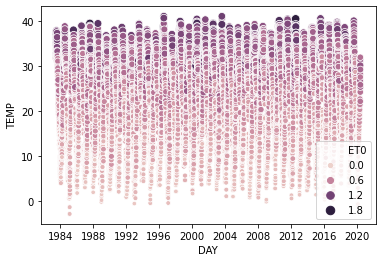

In [13]:

sns.scatterplot(x='DAY', y='TEMP', hue="ET0", size="ET0", data=filled_weather)

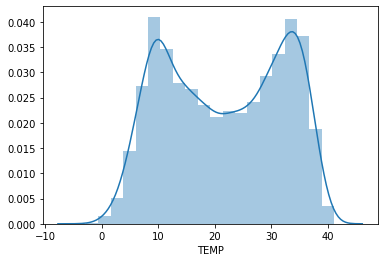

In [16]:
sns.distplot(filled_weather['TEMP'], bins=20)

In [0]:
with pd.ExcelWriter('Weather_Kursk_1983_2020.xlsx') as writer:
    filled_weather.to_excel(writer)

## Mount Google Drive 

In [18]:
!ls

sample_data  Weather_Kursk_1983_2020.xlsx


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
